In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
train =  pd.read_csv("/content/drive/My Drive/Collab/Houseprice_regression/train.csv")

DATA WRANGLING



In [228]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [229]:
train = train.drop(["Id","Alley","PoolQC","Fence","MiscFeature"], axis = 1)

In [230]:
train = train.fillna(train.mean())
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","FireplaceQu","GarageType","GarageFinish",'GarageQual','GarageCond'):
    train[col]=train[col].fillna(train[col].mode()[0])

In [119]:
objList = train.select_dtypes(include = "object").columns
print (objList.shape)

(39,)


In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    train[feat] = le.fit_transform(train[feat].astype(str))
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [121]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


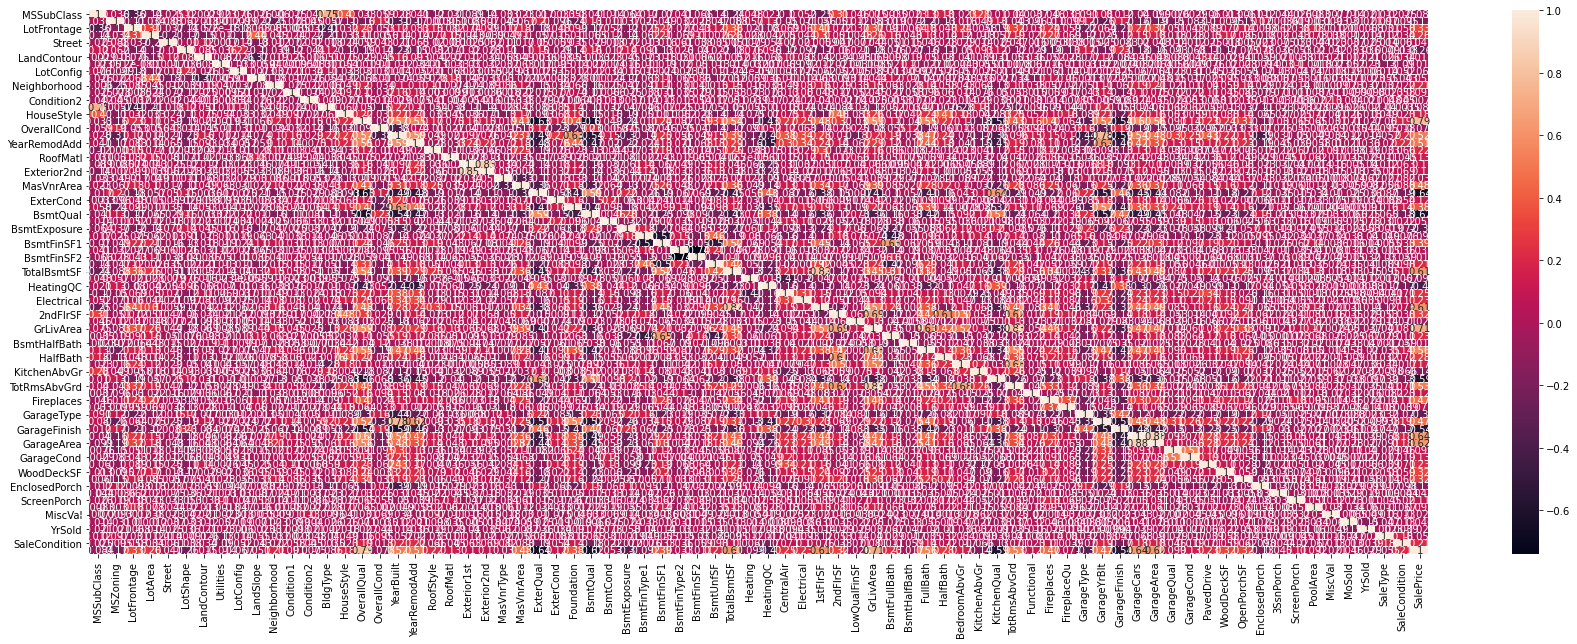

In [122]:
plt.figure(figsize = (30,10))
cor =  train.corr()
sns.heatmap(data = cor , annot = True)

In [123]:
cor_target = abs( cor["SalePrice"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual       0.636884
BsmtQual        0.618025
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual     0.589189
TotRmsAbvGrd    0.533723
GarageFinish    0.537242
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [124]:
train = train[["OverallQual","YearBuilt","YearRemodAdd","ExterQual","BsmtQual","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","KitchenQual","TotRmsAbvGrd","GarageFinish","GarageCars","GarageArea","SalePrice"]]

In [125]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [126]:
x =x.values
y=y.ravel()

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

##APPLYING MACHINE LEARNING MODELS


LINEAR REGRESSION

In [129]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred_lr = linear.predict(x_test)

In [178]:
x_train.shape

(1168, 14)

In [130]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
print("mean_absolute_error : ",mean_absolute_error(y_test, y_pred_lr))
print("mean_squared_error : ",mean_squared_error(y_test, y_pred_lr))
print("r2_score : ",r2_score(y_test, y_pred_lr))

mean_absolute_error :  29538.101746912827
mean_squared_error :  1568577536.8227742
r2_score :  0.7955005439855986


RIDGE REGRESSION

In [131]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.5, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)

In [132]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
print("mean_absolute_error : ",mean_absolute_error(y_test, pred))
print("mean_squared_error : ",mean_squared_error(y_test, pred))
print("r2_score : ",r2_score(y_test, pred))

mean_absolute_error :  29021.28981918481
mean_squared_error :  1629846409.679056
r2_score :  0.7875127646915612


LASSO REGRESSION

In [133]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.1, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)

In [134]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
print("mean_absolute_error : ",mean_absolute_error(y_test, pred))
print("mean_squared_error : ",mean_squared_error(y_test, pred))
print("r2_score : ",r2_score(y_test, pred))

mean_absolute_error :  29536.42662398318
mean_squared_error :  1568395382.9566324
r2_score :  0.7955242918499295


ELASTICNET REGRESSION

In [135]:
from sklearn.linear_model import ElasticNet
Elreg = ElasticNet(random_state=0)
Elreg.fit(x_train,y_train)
pred = Elreg.predict(x_test)

In [136]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
print("mean_absolute_error : ",mean_absolute_error(y_test, pred))
print("mean_squared_error : ",mean_squared_error(y_test, pred))
print("r2_score : ",r2_score(y_test, pred))

mean_absolute_error :  44123.94208464748
mean_squared_error :  4393426868.143244
r2_score :  0.4272177284941825


STOCHASTIC GRADIENT DESCENT *REGRESSION*

In [138]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd=sgd.fit(x_train,y_train)
sgd=sgd.predict(x_test)

In [139]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
print("mean_absolute_error : ",mean_absolute_error(y_test, sgd))
print("mean_squared_error : ",mean_squared_error(y_test, sgd))
print("r2_score : ",r2_score(y_test, sgd))

mean_absolute_error :  27392.4956960123
mean_squared_error :  1489075608.1585722
r2_score :  0.8058654132905974


DECISION TREE REGRESSION

In [141]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5,random_state = 0)
regressor.fit(x_train, y_train)
regressor=regressor.predict(x_test)

In [142]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
print("mean_absolute_error : ",mean_absolute_error(y_test, regressor))
print("mean_squared_error : ",mean_squared_error(y_test, regressor))
print("r2_score : ",r2_score(y_test, regressor))

mean_absolute_error :  38337.27997965213
mean_squared_error :  3622393912.888303
r2_score :  0.527739262315323


RANDOMTREE REGRESSION

In [143]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=5,n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
regressor=regressor.predict(x_test)

In [144]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
print("mean_absolute_error : ",mean_absolute_error(y_test, regressor))
print("mean_squared_error : ",mean_squared_error(y_test, regressor))
print("r2_score : ",r2_score(y_test, regressor))

mean_absolute_error :  35162.42380884611
mean_squared_error :  2673967718.423211
r2_score :  0.6513880053865646


SUPPORT VECTOR REGRESSION

In [145]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


In [146]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
print("mean_absolute_error : ",mean_absolute_error(y_test, y_pred))
print("mean_squared_error : ",mean_squared_error(y_test, y_pred))
print("r2_score : ",r2_score(y_test, y_pred))

mean_absolute_error :  59456.75012856458
mean_squared_error :  7846601839.146311
r2_score :  -0.02298150394099463


FROM THE ABOVE TRAINED MODELS WE CAN SEE THAT STOCHASTIC GRADIENT DESCENT REGRESSION i.e SGD REGRESSOR GOT THE BETTER SQUARED R SCORE , SO SGD REGRESSOR IS THE BEST MODEL FOR OUR PROBLEM  

In [221]:
test =  pd.read_csv("/content/drive/My Drive/Collab/Houseprice_regression/test.csv")

In [212]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [213]:
test = test.drop(["Id","Alley","PoolQC","Fence","MiscFeature"], axis = 1)

In [214]:
test = test.fillna(test.mean())
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","FireplaceQu","GarageType","GarageFinish",'GarageQual','GarageCond'):
    test[col]=test[col].fillna(test[col].mode()[0])

In [215]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    test[feat] = le.fit_transform(test[feat].astype(str))
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int64  
 5   LotShape       1459 non-null   int64  
 6   LandContour    1459 non-null   int64  
 7   Utilities      1459 non-null   int64  
 8   LotConfig      1459 non-null   int64  
 9   LandSlope      1459 non-null   int64  
 10  Neighborhood   1459 non-null   int64  
 11  Condition1     1459 non-null   int64  
 12  Condition2     1459 non-null   int64  
 13  BldgType       1459 non-null   int64  
 14  HouseStyle     1459 non-null   int64  
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [216]:
test = test[["OverallQual","YearBuilt","YearRemodAdd","ExterQual","BsmtQual","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","KitchenQual","TotRmsAbvGrd","GarageFinish","GarageCars","GarageArea"]]

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
test = scaler.fit_transform(test)

In [218]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd=sgd.fit(x_train,y_train)


In [219]:
sgd=sgd.predict(test)

In [223]:
data = pd.DataFrame(sgd,index = test.Id,columns=["House price"])
data.head()

,House price
Id,
1461,111030.052154
1462,145578.971006
1463,162998.441190
1464,180432.938571
1465,208569.546523


In [226]:
data.to_csv("/content/drive/My Drive/Collab/Houseprice_regression/predicted prices.csv")  